# Activity 01
### Tyler Barna

In [41]:
## import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import random
random.seed(5731)

## import data (altered name slightly to read in easier)
df = pd.read_csv('data/BD+284211.csv') 
df.head()

,objID,filterID,obsTime,ra,dec,airMass,psfFlux,psfFluxErr,infoFlag2
0,142623277801099039,3,55783.533723,327.780210,28.856972,1.10768,0.000012,0.000001,32
1,142623277801099039,3,55783.545668,327.780254,28.856969,1.14538,0.000011,0.000001,32
2,142623277801099039,3,56145.539254,327.780176,28.856968,1.09852,0.000016,0.000002,0
3,142623277801099039,3,56145.550525,327.780095,28.857105,1.13188,0.000010,0.000002,32
4,142623277801099039,3,55407.562255,327.780157,28.856985,1.10530,0.000015,0.000002,0


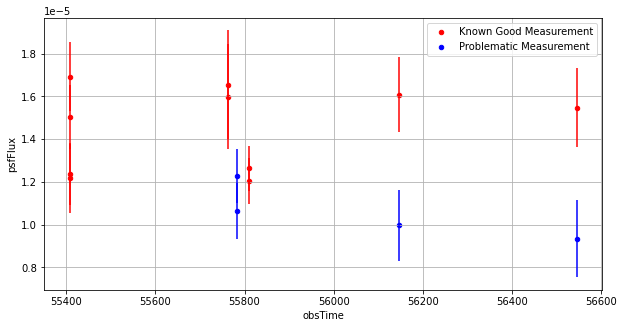

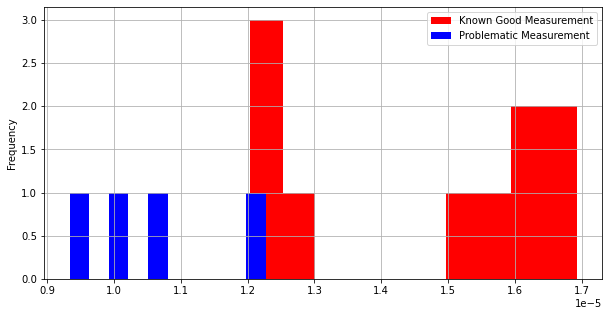

In [40]:
## visual inspection of data/plotting flux vs time
ax1 = df[df['infoFlag2'] == 0].plot(x='obsTime', y='psfFlux', yerr='psfFluxErr', kind='scatter', color='red', figsize=(10,5), label='Known Good Measurement');
df[df['infoFlag2'] > 0].plot(x='obsTime', y='psfFlux', yerr='psfFluxErr', kind='scatter', color='blue', figsize=(10,5), ax = ax1, label='Problematic Measurement',grid=True);

## plotting histogram of flux
ax2 = df[df['infoFlag2'] == 0].plot(x='obsTime', y='psfFlux', yerr='psfFluxErr', kind='hist', color='red', figsize=(10,5), label='Known Good Measurement');
df[df['infoFlag2'] > 0].plot(x='obsTime', y='psfFlux', yerr='psfFluxErr', kind='hist', color='blue', figsize=(10,5), ax = ax2, label='Problematic Measurement',grid=True);


#### 1

Looking at the flux values, they are noticeably small, being on the order of $10^{-5}$.

Taking into account measurement errors, the flux measurements flaged as 'good' remain fairly constant over time with some exceptions around 55800.

However, the flux measurements flagged as 'problematic' are more variable and are lower in value than the 'good' measurements.

#### 2 

Given the title of this lab activity and what we discussed in lecture on Monday, I would expect the most informative model to use would be modeling a normal distribution.

In [53]:
## Using stats normality test to see if data is potentially normally distributed
display(stats.normaltest(df['psfFlux']))
display(stats.normaltest(df[df['psfFlux'] > 0]['psfFlux']))

## not really useful for our purposes

NormaltestResult(statistic=2.906558463174379, pvalue=0.233802337627548)

NormaltestResult(statistic=2.906558463174379, pvalue=0.233802337627548)

Mean of Posterior (estimate of theta)
$$\begin{equation}
\theta = \left( \frac{n}{\nu} + \frac{1}{b}\right)^{-1} \left( \frac{n \bar{x}}{\nu} + \frac{a}{b}\right)
\end{equation}$$

Variance
$$\begin{equation}
\nu = \left( \frac{n}{\nu} + \frac{1}{b}\right)^{-1}
\end{equation}$$

$$\begin{equation}
X \sim N(\theta, \nu)
\end{equation}$$
where $ \theta = N(a,b)$, with $a$ and $b$ being the mean and variance of the prior distribution.


#### 3

In [98]:
## finding error variance
nu = df['psfFluxErr'].mean()
numPoints = len(df['psfFluxErr'])
xBar = df['psfFlux'].mean()
a = 0 ## mean of prior distribution (chosen to be 0)
b = 1 ## variance of prior distribution (chosen to be 1)

In [99]:
## Finding mean and variance of posterior distribution
posteriorMean = (numPoints/nu + 1/b)**(-1) * (numPoints*xBar/nu + a/b)
print('posterior mean = ', posteriorMean)

posteriorVar = (numPoints/nu + 1/b)**(-1)
print('posterior variance = ', posteriorVar)

posterior mean =  1.3389645566409883e-05
posterior variance =  1.1698207937071528e-07


#### 4 (partial?)

Text(0.5, 0, 'Measured Flux')

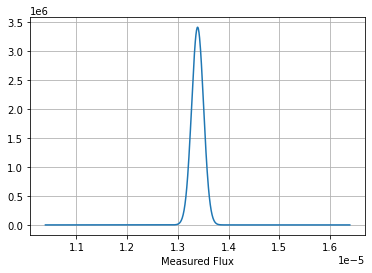

In [100]:
## compute model of posterior distribution
x = np.linspace(posteriorMean - 3e-6, posteriorMean + 3e-6, 1000)
## pdf of normal distribution (using method built into scipy.stats, though could also be done by hand)
y = norm.pdf(x, posteriorMean, posteriorVar) 
plt.plot(x, y, label='Posterior Distribution')
plt.grid()
plt.xlabel('Measured Flux')